<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Supervised-Models/RandomForest_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict Housing Price using RandomForestRegressor

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

%matplotlib inline



In [0]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [3]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
features.shape

(506, 13)

In [10]:
targets.shape

(506,)

## Data Statistics

In [4]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Data Visualization

In [0]:
data = features.copy()
data['Price'] = targets

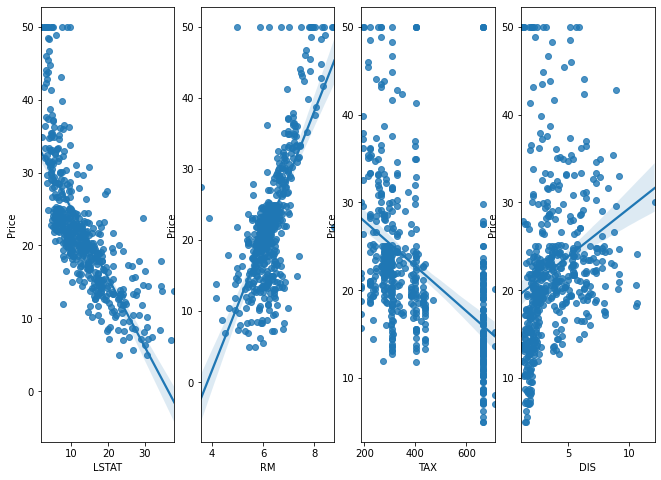

In [21]:
fig,axes = plt.subplots(1,4,figsize=(11,8))
sns.regplot(x = 'LSTAT',y= 'Price',data=data,ax=axes[0])
sns.regplot(x = 'RM',y= 'Price',data=data,ax=axes[1])
sns.regplot(x = 'TAX',y= 'Price',data=data,ax=axes[2])
sns.regplot(x = 'DIS',y= 'Price',data=data,ax=axes[3])

## Split the sample data into training and test set

In [0]:
X_train,X_test,y_train,y_test = train_test_split(features,targets,test_size=0.2,random_state=1)

## normalize data

In [0]:
sc = StandardScaler()

## Create a model using RandomForestRegressor

In [0]:
rf = RandomForestRegressor()

In [0]:
# Create a pipeline of three steps. First, standardize the data.
# Second,  train a Ranom Forest Regressor on the data.
pipe = Pipeline(steps=[('sc', sc),('randomforestregressor', rf)])

In [0]:
param_grid = {'randomforestregressor__n_estimators': [100,500, 700, 1000], 'randomforestregressor__max_depth': [None, 1, 2, 3], 'randomforestregressor__min_samples_split': [1, 2, 3]}

## Conduct Parameter Optmization With Pipeline

In [0]:
clf = GridSearchCV(pipe,param_grid,cv=5,verbose=2)

In [31]:
## Fit the grid search
clf.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=100, total=   0.0s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=100, total=   0.0s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=100, total=   0.0s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estima

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test par

[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 
[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 
[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.3s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.3s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.3s
[CV] randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.3s
[CV] randomforestregressor__max_dept

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 
[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 
[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.3s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.1s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.1s
[CV] randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.1s
[CV] randomforestregressor__max_depth=1, randomforestregr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 
[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 
[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.2s
[CV] randomforestregressor__max_depth=2, randomforestregr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=500, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=700, total=   0.3s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=1, randomforestregressor__n_estimators=1000, total=   0.4s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregr

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                         


## View The Best Parameters

In [33]:
print('Best Criterion:', clf.best_estimator_.get_params()['randomforestregressor__n_estimators'])
print('Best max_depth:', clf.best_estimator_.get_params()['randomforestregressor__max_depth'])
print('Best min samples split:', clf.best_estimator_.get_params()['randomforestregressor__min_samples_split'])
print(); print(clf.best_estimator_.get_params()['randomforestregressor'])

Best Criterion: 700
Best max_depth: None
Best min samples split: 2

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


## Predictions

In [0]:
y_pred = clf.predict(X_test)

## summarize the fit of the model


In [37]:
print(f'R Squared error: {r2_score(y_test, y_pred)}')
print(f'Root Mean Squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R Squared error: 0.9127732645369078
Root Mean Squared error: 2.936050162620357


## plot regression
 

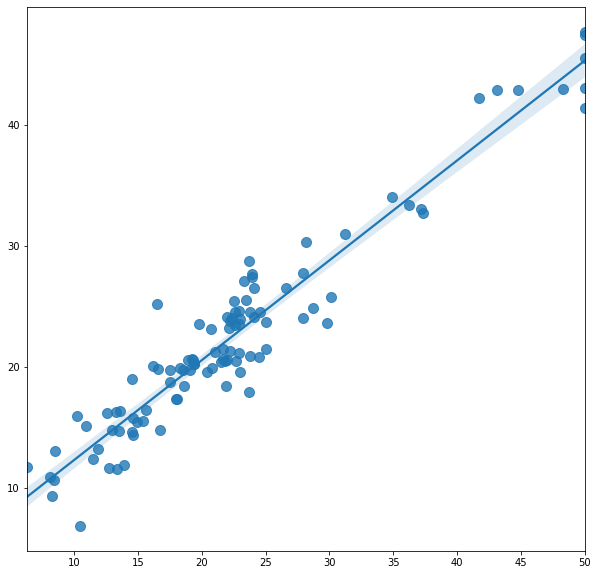

In [38]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})